In [10]:
#!pip uninstall opencv-python 
#!pip install opencv-python
#!pip uninstall opencv-python-headless -y 

In [1]:
import cv2
import numpy as np
import os

# Lista para armazenar as bandas da imagem
from osgeo import gdal
# ... and suppress errors
gdal.PushErrorHandler('CPLQuietErrorHandler')

import rasterio

In [13]:
rasterio.open(f'../sen2corimgs/L1C_IMAGEM_1/subset_0_of_S2B_MSIL1C_20220705T135709_N0400_R067_T21MYS_20220705T172624_resampled.tif').read(1)

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


array([[   0,    0,    0, ..., 4189, 3812, 3994],
       [   0,    0,    0, ..., 4180, 3877, 3878],
       [   0,    0,    0, ..., 4139, 3947, 4068],
       ...,
       [2825, 2730, 2697, ..., 2127, 2128, 2137],
       [2862, 2769, 2764, ..., 2133, 2137, 2147],
       [2890, 2790, 2766, ..., 2137, 2136, 2148]], dtype=uint16)

In [14]:
imagens = []

pastas = os.listdir('../sen2corimgs/')


# Loop sobre as 13 bandas da imagem Sentinel-2
for pasta in pastas:
    bandas = []
    L1C_IMG = os.listdir(f'../sen2corimgs/{pasta}')
    L1C_IMG.remove('.ipynb_checkpoints') if '.ipynb_checkpoints' in L1C_IMG else ...
    L1C_IMG = sorted(L1C_IMG)[2]
    for i in range(1, 14):
        # Constrói o caminho completo para o arquivo de imagem da banda específica
        banda_i = rasterio.open(f'../sen2corimgs/{pasta}/{L1C_IMG}').read(i).astype(np.float32) * 0.0001 # 60 m de resolução (subset = 0 (60m) )
        # Normaliza os valores da banda dividindo por 10000 (processamento exigido pela documentação do S2Cloudless)
        # Adiciona a banda à lista de bandas
        bandas.append(banda_i)
    bands_array = np.stack(bandas, axis=-1)
    imagens.append(bands_array)

print(imagens[0].shape)

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

(1830, 1830, 13)


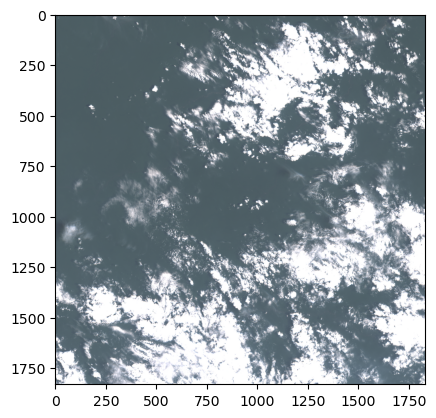

In [29]:
import matplotlib.pyplot as plt
true_color_image = (imagens[2][..., [3, 2, 1]] * 2).clip(0, 1)

plt.imshow(true_color_image)
plt.imsave('true_color_image.jpg', true_color_image)

In [2]:
import cv2
import numpy as np

# Carregar a imagem
imagem = cv2.imread('true_color_image.jpg', cv2.IMREAD_UNCHANGED)

# Converter a imagem para tons de cinza
tons_de_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar um desfoque para reduzir o ruído
imagem_desfocada = cv2.GaussianBlur(tons_de_cinza, (3, 3), 50)

# Aplicar a detecção de bordas usando o operador Canny
bordas = cv2.Canny(imagem_desfocada, 150, 10)

# Encontrar os contornos na imagem
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma imagem preta para a máscara
imagem_contornada = imagem.copy()

# Preencher os contornos na imagem contornada
cv2.drawContours(imagem_contornada, contornos, -1, (0, 255, 0), thickness=cv2.FILLED)

# Mostrar a imagem contornada
cv2.imshow('Imagem Contornada com Preenchimento', imagem_contornada)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x86243d0) is not the object's thread (0x728f690).
Cannot move to target thread (0x86243d0)

QObject::moveToThread: Current thread (0x86243d0) is not the object's thread (0x728f690).
Cannot move to target thread (0x86243d0)

QObject::moveToThread: Current thread (0x86243d0) is not the object's thread (0x728f690).
Cannot move to target thread (0x86243d0)

QObject::moveToThread: Current thread (0x86243d0) is not the object's thread (0x728f690).
Cannot move to target thread (0x86243d0)

QObject::moveToThread: Current thread (0x86243d0) is not the object's thread (0x728f690).
Cannot move to target thread (0x86243d0)

QObject::moveToThread: Current thread (0x86243d0) is not the object's thread (0x728f690).
Cannot move to target thread (0x86243d0)

QObject::moveToThread: Current thread (0x86243d0) is not the object's thread (0x728f690).
Cannot move to target thread (0x86243d0)

QObject::moveToThread: Current thread (0x86243d0) is not the object's thread

In [4]:
import cv2
import numpy as np

# Carregar a imagem
imagem = cv2.imread('true_color_image.jpg', cv2.IMREAD_UNCHANGED)

# Converter a imagem para tons de cinza
tons_de_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar um desfoque para reduzir o ruído
imagem_desfocada = cv2.GaussianBlur(tons_de_cinza, (3, 3), 50)

# Aplicar a detecção de bordas usando o operador Canny
bordas = cv2.Canny(imagem_desfocada, 150, 10)

# Encontrar os contornos na imagem
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Desenhar os contornos diretamente na imagem original sem preenchimento
cv2.drawContours(imagem, contornos, -1, (0, 255, 0), 2)

# Mostrar a imagem com contornos
cv2.imshow('Imagem com Contornos', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x9193d40) is not the object's thread (0x918f510).
Cannot move to target thread (0x9193d40)

QObject::moveToThread: Current thread (0x9193d40) is not the object's thread (0x918f510).
Cannot move to target thread (0x9193d40)

QObject::moveToThread: Current thread (0x9193d40) is not the object's thread (0x918f510).
Cannot move to target thread (0x9193d40)

QObject::moveToThread: Current thread (0x9193d40) is not the object's thread (0x918f510).
Cannot move to target thread (0x9193d40)

QObject::moveToThread: Current thread (0x9193d40) is not the object's thread (0x918f510).
Cannot move to target thread (0x9193d40)

QObject::moveToThread: Current thread (0x9193d40) is not the object's thread (0x918f510).
Cannot move to target thread (0x9193d40)

QObject::moveToThread: Current thread (0x9193d40) is not the object's thread (0x918f510).
Cannot move to target thread (0x9193d40)

QObject::moveToThread: Current thread (0x9193d40) is not the object's thread

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Carregar a imagem verdadeira em cores
true_color_image = (imagens[2][..., [3, 2, 1]] * 2).clip(0, 1)

# Salvar a imagem verdadeira em cores
plt.imsave('true_color_image.jpg', true_color_image)

# Carregar a imagem contendo apenas os contornos invertidos
imagem_contornos_invertidos = cv2.imread('contornos_fechados_e_preenchidos.jpg', cv2.IMREAD_UNCHANGED)

# Plotar as imagens lado a lado
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotar a imagem verdadeira em cores
axs[0].imshow(true_color_image)
axs[0].set_title('Imagem Verdadeira em Cores')

# Plotar a imagem contendo apenas os contornos invertidos
axs[1].imshow(imagem_contornos_invertidos, cmap='gray')
axs[1].set_title('contornos_fechados_e_preenchidos')

# Exibir a figura
plt.show()
